# Atividade 2: Previsão das doenças cardiácas utilizando Regressão Logística

## Passos a se seguir:
* Análise Exploratória dos dados com visualizações
* Preparação dos dados do Dataframe para o modelo
* Aplicação do modelo de Regressão Logística
* Conclusões acerca da atividade

##  Análise Exploratória dos dados com visualizações

### A análise exploratória de dados (EDA) é usada por cientistas de dados para analisar e investigar os conjuntos de dados e resumir suas principais características, muitas vezes usando métodos de visualização de dados.

### Primeiro passo para isso é conhecermos com o quê estamos trabalhando e quais as propriedades nele contidas: 

In [ ]:
# Vamos começar importando as bibliotecas necessárias para isso
import pandas as pd # Biblioteca que usamos para manipular nossas tabelas
import matplotlib.pyplot as plt # Essa será usada para criação de gráficos que permitem analisar nossos dados melhor

# E, o mais importante, importar o nosso dataset, que nada mais é que o conjunto de dados que iremos analisar
# Iremos ler o dataset e atribuir a um Dataframe, que é uma estrutura do pandas que facilita a manipulação dos dados
df = pd.read_csv('https://raw.githubusercontent.com/victor-ferreira/dataset/main/exercicio2.csv')

# Vamos visualizar um pouco do nosso DF, mostrando as 5 primeiras entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Para acelerar o nosso processo de identificação do DF, vamos utilizar um método chamado info para verificar
# as principais propriedades do mesmo, sabendo também a quantidade de nulos (caso houver):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# O método info nos dá muita informação sobre com o quê estamos trabalhando, mas não nos permite conhecer
# todas as informações das colunas, por isso, iremos usar um método chamado dtypes para ver os tipos das nossas colunas
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# Podemos perceber que todas as nossas colunas possuem valores numéricos, sendo os int inteiros e float os números 
# de ponto flutuante, que basicamente quer dizer que possue uma virgula nele.

# Agora, mesmo com o info e columns, ainda não sabemos de certeza se não há valores vazios na nossa tabela
# Para verificar isso, podemos utilizar o método isnull junto com o sum para dar o total de nulos que temos:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

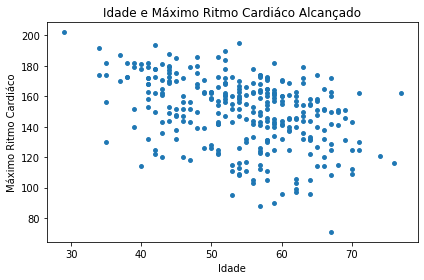

In [ ]:
# Agora que temos certeza que não há valores nulos na tabela, podemos já fazer algumas visualizações com os dados
# Podemos visualizar uma relação entre a idade 'age' e 'thalach' que é o máximo ritmo cardíaco alcançado de cada paciente
# sobre o 'thalach' tive que pesquisar online para visualizar o dicionário de colunas.

# Um bom gráfico para ver esses dados é o Scatterplot, que é um gráfico de dispersão que nos permite visualizar aonde há
# maior densidade de certos valores, podendo ser importante para a aparição de doenças cardiovasculares

# Plotando um Scatterplot
# Precisamos definir uma figura e os eixos dela, para isso usamos o fig e o ax:
fig, ax = plt.subplots()

# Plotando relação entre idade e batimentos cardiácos:
df.plot.scatter(x='age', y='thalach', ax=ax, s=15)
ax.set_title('Idade e Máximo Ritmo Cardiáco Alcançado')
ax.set_xlabel('Idade')
ax.set_ylabel('Máximo Ritmo Cardiáco')

plt.tight_layout()

### Podemos analisar um decréscimo do Máximo Ritmo Cardíaco ao aumentarmos a idade, sendo realmente algo lógico, já que o ritmo cardíaco descresce conforme ficamos mais velhos.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


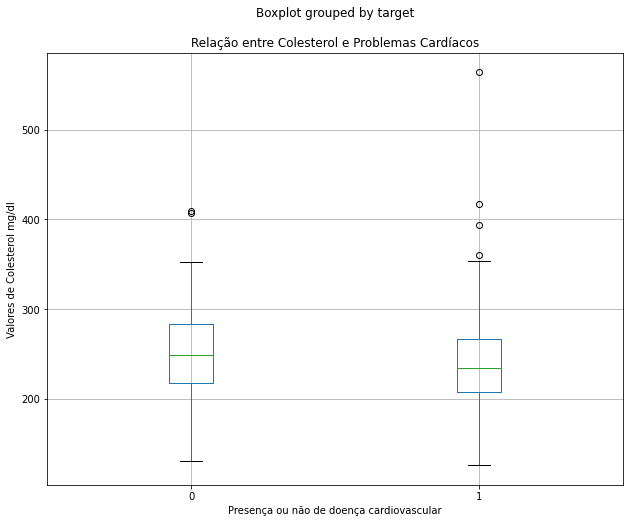

In [ ]:
# Nessa visualização podemos ver um decréscimo de máximo ritmo cardiáco ao longo da idade dos entrevistados

# Podemos também ver se há alguma relação entre a presença de colesterol alto nos pacientes entrevistados
# e também a pressão sanguínea irregular pode ser um fator importante para analisar estes dados.
# Por isso, vamos usar o gráfico de boxplot para vermos a média de ambos os valores, os máximos e mínimos e os quartis

# Os valores de colesterol estão marcados por 'chol' e de pressão sanguínea por 'trestbps'
fig, ax = plt.subplots(figsize=(10,8))

df.boxplot(['chol'],by='target', ax=ax)
ax.set_title('Relação entre Colesterol e Problemas Cardíacos')
ax.set_ylabel('Valores de Colesterol mg/dl')
ax.set_xlabel('Presença ou não de doença cardiovascular')
plt.show()

### Podemos ver que os níveis de colesterol tem uma influência significável na presença de problemas cardiovasculares, sendo mais comum uma baixa de colesterol em pessoas que tem problemas cardiovasculares.

### Porém, podemos analisar que pessoas que tem colesterol muito acima da média, por exemplo a pessoa com mais de 500 mg/dl tem maior probabilidade de ter problemas cardiovasculares.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


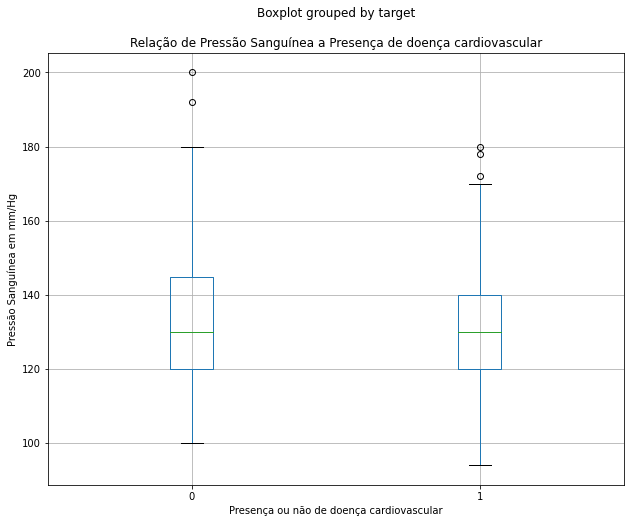

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

df.boxplot('trestbps', by='target', ax=ax)
ax.set_title('Relação de Pressão Sanguínea a Presença de doença cardiovascular')
ax.set_ylabel('Pressão Sanguínea em mm/Hg')
ax.set_xlabel('Presença ou não de doença cardiovascular')
plt.show()

### Podemos ver que no gráfico dos valores de Pressão Sanguínea tivemos um padrão de 120 a 140, sendo a baixa pressão mais comum entre quem tem doença cardiovascular. Porém, podemos ver que a média de ambos é a mesma, indicando que naquele espectro de pressão sanguínea não há anormalidades, ao menos para essa categoria de valores.

### Outra observação, as pessoas com taxas mais elevadas de pressão sanguínea aparentam ter uma chance menor de ter doenças cardiovasculares.

## Preparação dos dados do Dataframe para o modelo
### Normalizar os dados para podermos usar no modelo de Regressão Logística

In [ ]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Será nossa biblioteca para visualização de gráficos

# Por default, nesse notebook estamos usando o estilo matplotlib, então, para mudar isso fazemos assim:
sns.set_style()

###Temos que cumprir uma série de passos para ter um efetivo treinamento de nosso modelo de Regressão Logística, por isso, vamos fazer por etapas:
1. Importar a bibliotecas que vão ser utilizadas para criação do modelo
2. Instanciar e escolher os hiperparâmetros
3. Separação dos dados em treino e teste
4. Padronizar os dados de treino 

In [ ]:
# Passo 1: importar as bibliotecas
from sklearn.model_selection import train_test_split # Esse import é para auxiliar na divisão de treino e de teste
from sklearn.preprocessing import StandardScaler # É quem fará a padronização dos dados para o modelo

# Aqui serão as bibliotecas para avaliação de modelo
from sklearn.metrics import classification_report # Mostrará importantes métricas
from sklearn.metrics import confusion_matrix # Matriz de Confusão que é uma das principais formas de avaliação de modelo

In [ ]:
# Passo 2: Instanciar e escolher os Hiperparâmetros
# Aqui vamos instanciar qual será o nosso modelo para previsão de dados, que neste caso é um modelo
# de Regressão Logística, precisando também importar este modelo:
from sklearn.linear_model import LogisticRegression

# Agora, vamos instanciar o nosso modelo para fazer Regressão Logística
model = LogisticRegression()

In [ ]:
# Passo 3: Separação dos dados de treino e de teste
# Para esse passo, precisamos encontrar a variável dependente, que basicamente é a variável que queremos
# prever com o nosso modelo, que neste caso é se há ou não doença cardíaca, indicada pela coluna 'target'

# Então, vamos instanciar uma parte para os resultados e outra para os parâmetros que vamos analisar
# O x será os parâmetros que iremos analisar e o y os resultados:
x = df.drop('target', axis=1)
y = df['target']

# Após isso, podemos usar o método que importamos 'train_test_split()' para dividirmos os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
# Passo 4: Padronizar os dados de treino
# Vamos padronizar os dados de treino utilizando o método 'StandardScaler' que importamos
# Precisamos disso pois facilita a compreensão pelo nosso modelo, aumentando assim a precisão final

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

## Aplicação do modelo de Regressão Logística

###Agora, depois de analisar, filtrar os dados e transformar-los para uma forma que o Modelo melhor compreenda, podemos finalmente aplicar o modelo de Regressão Logística. Então precisamos agora treinar o modelo e avaliar-lo de acordo com as métricas que importamos.

In [ ]:
# Para realizar o treinamento podemos usar o método fit
# para as variáveis de treinamento x_train e y_train:
model.fit(x_train, y_train)

# E agora finalmente podemos testar, fazendo a previsão em cima de novos dados
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

###Agora vamos avaliar nosso modelo, utilizando o relatório de classificação e a matriz de confusão:

In [ ]:
# Imprimindo relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.84      0.86      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



###Podemos ver várias métricas importantes para determinar a qualidade do nosso modelo, mostrando por exemplo a precisão para achar se há ou não doença cardiovascular:
* Em precision, podemos ver que houve uma precisão de 81% para achar as pessoas que não tem problema cardiovascular (marcadas por 0). E, para encontrar pessoas com problemas cardiovasculares temos uma precisão de 84% (marcadas por 1).
* Acurácia de 83% geral, mostrando que o nosso modelo realmente é eficaz em determinar quais pacientes tem ou não tem problemas cardiovasculares.



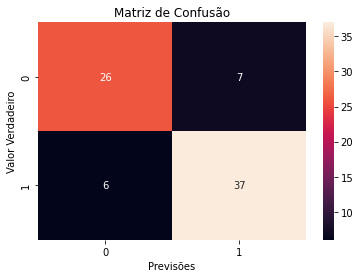

In [ ]:
# Plotar a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title('Matriz de Confusão')
ax.set_ylabel('Valor Verdadeiro')
ax.set_xlabel('Previsões')

plt.show()

### Matriz de Confusão
### Neste gráfico podemos ver a quantidade de acertos e erros do nosso modelo, sendo os acertos mostrados pelas correspondentes colunas e linhas, (0, 0) e (1, 1) e os erros pelas coordenadas (0,1) e (1,0). Aqui vai a leitura do Gráfico de Confusão:
* Em identificar pessoas que não tem doença cardiovascular (marcadas por 0), o modelo acertou 26 e errou 6.
* Em identificar pessoas que tem doença cardiovascular (marcadas por 1), o modelo acertou 37 e errou 7.


## Conclusão



### Creio que maior parte das relações entre os dados vistos no dataset de problemas cardiovasculares são difíceis de se relacionar somente em pares, sendo preciso realmente um método mais sofisticado para determinar se há ou não problemas cardiovasculares. Portanto, algo como esse Modelo de Regressão Linear realmente auxilia bastante a encontrar padrões que seriam quase impossíveis de encontrar a olho humano.

### Apesar das dificuldades, foi uma atividade bastante divertida de fazer visto que dispertou ainda mais da minha curiosidade acerca de métodos para o estudo dos dados e também de sua importância como um todo.

### Pode parecer pouco mas uma efetividade de 83% para prever doenças cardiovasculares é capaz de salvar várias vidas e também poupar as inúmeras consultas médicas que as pessoas fazem até descobrir que realmente há problemas graves nos pacientes.